# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ftp_patator/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.53453           0.77061          0.00561              0.00000   
1            0.53453           0.10058          0.37616              0.00005   
2            0.53453           0.23016          0.23842              0.02231   
3            0.53453           0.85944          0.10949              0.00000   
4            0.53453           0.23016          0.61636              0.02235   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.75719                0.00000                   0.00010   
1            0.76752                0.00080                   0.00133   
2            0.76718                0.00198                   0.00791   
3            0.00204                0.00078                   0.00120   
4            0.76848                0.00198                   0.00766   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00022            0.00742                0.00000  ...   
1               0.00239            0.00742                0.00012  ...   
2               0.02106            0.00742                0.02119  ...   
3               0.00282            0.00218                0.00000  ...   
4               0.02019            0.00742                0.01943  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0           0                       0       tcp     none          SH   
1        1915                       6       tcp      ssl          SF   
2      290589                     160       tcp      ssl          SF   
3           0                       0       udp      dns          S0   
4      266707                     152       tcp      ssl          SF   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn         resp_443              No            No   
1  orig_reg_or_dyn         resp_443              No            No   
2  orig_reg_or_dyn         resp_443              No            No   
3  orig_well_known  resp_well_known              No            No   
4  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0   2017-07-04T13:05:10.09719Z  
1  2017-07-04T13:16:16.943791Z  
2  2017-07-04T13:12:09.069054Z  
3  2017-07-04T13:08:17.049633Z  
4  2017-07-04T13:23:29.209443Z  

[5 rows x 300 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.53453           0.85944          0.99208              0.00000   
1            0.53453           0.85944          0.19842              0.00003   
2            0.53453           0.77061          0.59712              0.00330   
3            0.53453           0.46095          0.87472              0.00320   
4            0.00000           0.85944          0.35963              0.00466   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.73778                0.00387                   0.00386   
1            0.93073                0.00007                   0.00013   
2            0.05111                0.00000                   0.00020   
3            0.82180                0.00057                   0.00095   
4            0.90870                0.00016                   0.00084   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00043            0.00134                0.00005  ...   
1               0.00043            0.00074                0.00001  ...   
2               0.00087            0.00120                0.00000  ...   
3               0.00174            0.00742                0.00023  ...   
4               0.00239            0.00019                0.00001  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         686                       2       udp      krb          SF   
1         214                       2       udp      dns          SF   
2          92                       2       tcp     none          SF   
3        3271                       6       tcp      ssl        RSTR   
4        1056                      17       tcp      ftp          SF   

        orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn  resp_well_known              No           Yes   
1  orig_reg_or_dyn          resp_53              No            No   
2  orig_reg_or_dyn          resp_80              No            No   
3  orig_reg_or_dyn         resp_443              No            No   
4  orig_reg_or_dyn          resp_21             Yes           Yes   

                     timestamp  
0   2017-07-04T13:34:45.35888Z  
1  2017-07-04T13:10:57.080574Z  
2  2017-07-04T13:22:54.589056Z  
3   2017-07-04T13:31:14.15159Z  
4  2017-07-04T13:15:47.190892Z  

[5 rows x 300 columns]

## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 21568 rows and 300 columns


In [6]:
# selected_df.info()

In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode          3
orig_orig_connection.service_mode           7
orig_orig_connection.conn_state_mode        4
orig_resp_connection.protocol_mode          4
orig_resp_connection.service_mode           6
orig_resp_connection.conn_state_mode        4
resp_orig_connection.protocol_mode          3
resp_orig_connection.service_mode           3
resp_orig_connection.conn_state_mode        3
resp_resp_connection.protocol_mode          3
resp_resp_connection.service_mode           7
resp_resp_connection.conn_state_mode       11
uid                                     21568
originated_ip                              16
responded_ip                             1457
protocol                                    3
service                                    14
conn_state                                 12
orig_p_cat                                  2
resp_p_cat                                  9
attacker_label                              2
victim_label                      

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        21568.00000       21568.00000      21568.00000   
mean             0.50931           0.73600          0.43839   
std              0.11341           0.23925          0.29346   
min              0.00000           0.00000          0.00000   
25%              0.53453           0.77061          0.17921   
50%              0.53453           0.85944          0.37603   
75%              0.53453           0.85944          0.67348   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          21568.00000        21568.00000            21568.00000   
mean               0.00928            0.73425                0.00079   
std                0.02891            0.27208                0.00981   
min                0.00000            0.00000                0.00000   
25%                0.00001            0.68920                0.00007   
50%                0.00003            0.81880                0.00010   
75%                0.00303            0.92406                0.00041   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               21568.00000           21568.00000        21568.00000   
mean                    0.00128               0.00203            0.00312   
std                     0.01100               0.01295            0.02304   
min                     0.00000               0.00000            0.00000   
25%                     0.00013               0.00043            0.00074   
50%                     0.00017               0.00043            0.00074   
75%                     0.00084               0.00217            0.00194   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            21568.00000               21568.00000           21568.00000   
mean                 0.00075                   0.00077               0.00138   
std                  0.01241                   0.01240               0.01266   
min                  0.00000                   0.00000               0.00000   
25%                  0.00001                   0.00001               0.00013   
50%                  0.00001                   0.00002               0.00025   
75%                  0.00004                   0.00008               0.00100   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 21568.00000 21568.00000 21568.00000 21568.00000  21568.00000   
mean      0.61387     0.00362     0.05420     0.19047      0.01647   
std       0.48687     0.06003     0.22642     0.39268      0.04572   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      21568.00000                     21568.00000   
mean           0.43468                         0.43544   
std            0.26730                         0.29366   
min            0.00000                         0.00000   
25%            0.22097                         0.14988   
50%            0.34738                         0.36437   
75%            0.66479                         0.68184   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         21568.00000   
mean                              0.21570   
std                               0.13512   
min                               0.00000   
25%  

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.99208              0.00000            0.73778   
1          0.19842              0.00003            0.93073   
2          0.59712              0.00330            0.05111   
3          0.87472              0.00320            0.82180   
4          0.35963              0.00466            0.90870   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00387               0.00043            0.00134   
1                0.00007               0.00043            0.00074   
2                0.00000               0.00087            0.00120   
3                0.00057               0.00174            0.00742   
4                0.00016               0.00239            0.00019   

   connection.resp_bytes  connection.resp_pkts       orig_p_cat  \
0                0.00005               0.00025  orig_reg_or_dyn   
1                0.00001               0.00025  orig_reg_or_dyn   
2                0.00000               0.00025  orig_reg_or_dyn   
3                0.00023               0.00075  orig_reg_or_dyn   
4                0.00001               0.00213  orig_reg_or_dyn   

        resp_p_cat protocol service conn_state  dns_count  ssh_count  \
0  resp_well_known      udp     krb         SF    0.00000    0.00000   
1          resp_53      udp     dns         SF    1.00000    0.00000   
2          resp_80      tcp    none         SF    0.00000    0.00000   
3         resp_443      tcp     ssl       RSTR    0.00000    0.00000   
4          resp_21      tcp     ftp         SF    0.00000    0.00000   

   http_count  ssl_count  files_count  orig_orig_total  \
0     0.00000    0.00000      0.00000          0.04073   
1     0.00000    0.00000      0.00000          0.83801   
2     0.00000    0.00000      0.00000          0.38717   
3     0.00000    1.00000      0.07407          0.04401   
4     0.00000    0.00000      0.00000          0.29494   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                         1.00000                             0.00003   
1                         0.12947                             0.22982   
2                         0.60732                             0.25674   
3                         0.84139                             0.18483   
4                         0.34263                             0.11674   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                              0.03676                               0.10227   
1                              0.12452                               0.23242   
2                              0.13896                               0.17317   
3                              0.10142                               0.16398   
4                              0.17445                               0.03877   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                               0.00214                              0.02768   
1                               0.03702                              0.09226   
2                               0.05968                              0.11284   
3                               0.01170                              0.07062   
4                               0.00122                              0.18105   

   orig_orig_orig_p_well_known_count  orig_orig_orig_p_reg_or_dyn_count  \
0                            0.00971                            0.04077   
1                            0.01942                            0.83833   
2                            0.00971                            0.38754   
3                            0.00971                            0.04405   
4                            0.00000                            0.29569   

   orig_orig_resp_p_21_count  orig_orig_resp_p_22_count  \
0                    0.00000                    0.00000   
1                    0.00000                    0.66667   
2

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.9920793433754314, 5.567054808877647e-07, 0.7377762178000244,
        ..., 'udp', 'dns', 'SF'],
       [0.1984202227135451, 2.5947389158837222e-05, 0.9307319008668052,
        ..., 'udp', 'dns', 'SF'],
       [0.5971220362746952, 0.0033046232778701, 0.0511079233304847, ...,
        'tcp', 'http', 'SF'],
       ...,
       [0.8720174788862864, 9.157442213032775e-08, 0.8769381027957515,
        ..., 'udp', 'dns', 'SF'],
       [0.7602886705929931, 1.3185041645132414e-05, 0.4706385056769625,
        ..., 'udp', 'dns', 'SF'],
       [0.394536492982623, 1.2396049825155744e-07, 0.5237150531070688,
        ..., 'udp', 'dns', 'SF']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:03:54.
Cluster initiation:  1 (00:04:13), gamma: 0.11306507183821783
Cluster initiation:  2 (00:04:43), gamma: 0.11306507183821783
Cluster initiation:  3 (00:05:18), gamma: 0.11306507183821783
Cluster initiation:  4 (00:06:18), gamma: 0.11306507183821783
Cluster initiation:  5 (00:07:33), gamma: 0.11306507183821783
Cluster initiation:  6 (00:08:52), gamma: 0.11306507183821783
Cluster initiation:  7 (00:10:08), gamma: 0.11306507183821783
Done at 00:10:08.


In [18]:
print_info

['Cluster initiation:  1 (00:04:13), gamma: 0.11306507183821783',
 'Cluster initiation:  2 (00:04:43), gamma: 0.11306507183821783',
 'Cluster initiation:  3 (00:05:18), gamma: 0.11306507183821783',
 'Cluster initiation:  4 (00:06:18), gamma: 0.11306507183821783',
 'Cluster initiation:  5 (00:07:33), gamma: 0.11306507183821783',
 'Cluster initiation:  6 (00:08:52), gamma: 0.11306507183821783',
 'Cluster initiation:  7 (00:10:08), gamma: 0.11306507183821783']

In [19]:
cost

[110475.67078579371,
 75924.77247494688,
 47463.85434464318,
 40742.60722538237,
 36466.35312883891,
 32470.152515708367,
 30002.67483661066]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

Cluster         Cost
0        1 110475.67079
1        2  75924.77247
2        3  47463.85434
3        4  40742.60723
4        5  36466.35313
5        6  32470.15252
6        7  30002.67484

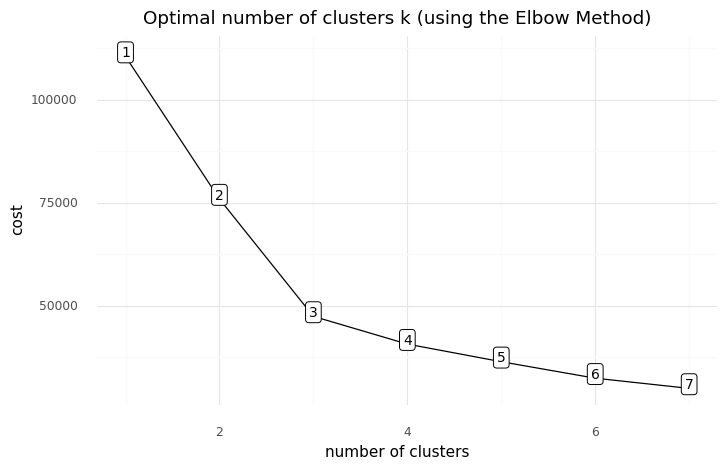

<ggplot: (8775267834088)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [23]:
# Fit the cluster
OPTIMAL_K = 4

kprototype = computed_clusters[OPTIMAL_K]
#kprototype = computed_clusters[0]

In [24]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.3993813635024181', '0.018794148888782752',
        '0.5501420095640949', '0.0009415663958027437',
        '0.0029231820604555315', '0.004581270835438079',
        '0.0013280502269395916', '0.0020455484168266994',
        '0.02173174872665535', '0.007470288624787776',
        '0.3969439728353141', '0.0020373514431239388',
        '0.0397912343582976', '0.29957714147638054',
        '0.40228575769316044', '0.2940500915139334',
        '0.18681585180540392', '0.26025880571231125',
        '0.0945297411995441', '0.14887683482067865',
        '0.30622578996818517', '0.2855461658045057',
        '0.0004997085877910932', '0.39219015280135733',
        '0.16130559794291774', '0.2992353247864406',
        '0.29153528983749044', '0.2551629209710983', '0.0',
        '0.29578504465933897', '0.1978494623655853',
        '0.055800792303339085', '0.49536200300576316',
        '0.022121397929443985', '0.3453509599100123',
        '0.43634927431578896', '0.48130797469064823',
        '0.0196

In [25]:
# Check the iteration of the clusters created
kprototype.n_iter_

4

In [26]:
# Check the cost of the clusters created
kprototype.cost_

36466.35312883891

In [28]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [29]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.99208              0.00000            0.73778   
1          0.19842              0.00003            0.93073   
2          0.59712              0.00330            0.05111   
3          0.87472              0.00320            0.82180   
4          0.35963              0.00466            0.90870   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00387               0.00043            0.00134   
1                0.00007               0.00043            0.00074   
2                0.00000               0.00087            0.00120   
3                0.00057               0.00174            0.00742   
4                0.00016               0.00239            0.00019   

   connection.resp_bytes  connection.resp_pkts       orig_p_cat  \
0                0.00005               0.00025  orig_reg_or_dyn   
1                0.00001               0.00025  orig_reg_or_dyn   
2                0.00000               0.00025  orig_reg_or_dyn   
3                0.00023               0.00075  orig_reg_or_dyn   
4                0.00001               0.00213  orig_reg_or_dyn   

        resp_p_cat protocol service conn_state  dns_count  ssh_count  \
0  resp_well_known      udp     krb         SF    0.00000    0.00000   
1          resp_53      udp     dns         SF    1.00000    0.00000   
2          resp_80      tcp    none         SF    0.00000    0.00000   
3         resp_443      tcp     ssl       RSTR    0.00000    0.00000   
4          resp_21      tcp     ftp         SF    0.00000    0.00000   

   http_count  ssl_count  files_count  orig_orig_total  \
0     0.00000    0.00000      0.00000          0.04073   
1     0.00000    0.00000      0.00000          0.83801   
2     0.00000    0.00000      0.00000          0.38717   
3     0.00000    1.00000      0.07407          0.04401   
4     0.00000    0.00000      0.00000          0.29494   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                         1.00000                             0.00003   
1                         0.12947                             0.22982   
2                         0.60732                             0.25674   
3                         0.84139                             0.18483   
4                         0.34263                             0.11674   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                              0.03676                               0.10227   
1                              0.12452                               0.23242   
2                              0.13896                               0.17317   
3                              0.10142                               0.16398   
4                              0.17445                               0.03877   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                               0.00214                              0.02768   
1                               0.03702                              0.09226   
2                               0.05968                              0.11284   
3                               0.01170                              0.07062   
4                               0.00122                              0.18105   

   orig_orig_orig_p_well_known_count  orig_orig_orig_p_reg_or_dyn_count  \
0                            0.00971                            0.04077   
1                            0.01942                            0.83833   
2                            0.00971                            0.38754   
3                            0.00971                            0.04405   
4                            0.00000                            0.29569   

   orig_orig_resp_p_21_count  orig_orig_resp_p_22_count  \
0                    0.00000                    0.00000   
1                    0.00000                    0.66667   
2

In [30]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [31]:
df['cluster'].value_counts()

2    8791
4    4571
3    4121
0    2945
1    1140
Name: cluster, dtype: int64

## 2. Results

In [32]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0           0     2945      tcp    http         SF  orig_reg_or_dyn   
1           1     1140      tcp     ftp         SF  orig_reg_or_dyn   
2           2     8791      udp     dns         SF  orig_reg_or_dyn   
3           3     4121      tcp     ssl         SF  orig_reg_or_dyn   
4           4     4571      udp     dns         SF  orig_reg_or_dyn   

  resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0    resp_80          0.39938              0.01879                0.00094   
1    resp_21          0.26642              0.00448                0.00033   
2    resp_53          0.45368              0.00043                0.00014   
3   resp_443          0.47107              0.03285                0.00297   
4    resp_53          0.44754              0.00013                0.00007   

   connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0               0.00292                0.00133               0.00205   
1               0.00272                0.00003               0.00223   
2               0.00054                0.00002               0.00028   
3               0.00634                0.00291               0.00439   
4               0.00024                0.00001               0.00013   

   dns_count  ssh_count  http_count  ssl_count  files_count  
0    0.02173    0.00747     0.39694    0.00204      0.03979  
1    0.02281    0.04912     0.00000    0.00000      0.00032  
2    0.97679    0.00000     0.00000    0.00000      0.00000  
3    0.00000    0.00000     0.00000    0.99490      0.05764  
4    0.99825    0.00000     0.00000    0.00044      0.00003

In [33]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

cluster_cat  cluster  orig_orig_total orig_orig_connection.protocol_mode  \
0           0     2945          0.29958                                udp   
1           1     1140          0.25038                                tcp   
2           2     8791          0.38216                                udp   
3           3     4121          0.39543                                udp   
4           4     4571          0.70407                                udp   

  orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
0                               dns                                   SF   
1                               ftp                                   SF   
2                               dns                                   SF   
3                               dns                                   SF   
4                               dns                                   SF   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                         0.40229                             0.29405   
1                         0.25594                             0.13258   
2                         0.45054                             0.27844   
3                         0.46713                             0.28473   
4                         0.44394                             0.00305   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.orig_pkts_mean  \
0                               0.26026                              0.18682   
1                               0.06714                              0.18175   
2                               0.27842                              0.17736   
3                               0.28027                              0.19048   
4                               0.02014                              0.00216   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  
0                               0.09453                              0.14888  
1                               0.01450                              0.18247  
2                               0.07940                              0.13631  
3                               0.09108                              0.14835  
4                               0.00089                              0.01114

In [34]:
pd.DataFrame(kprototype.cluster_centroids_)

0                       1                   2    \
0   0.3993813635024181    0.018794148888782752  0.5501420095640949   
1   0.2664226243846482     0.00448106892249382  0.8718253961879471   
2   0.4536840302496338   0.0004338200189193769  0.6979583768296395   
3  0.47107007604405293     0.03284663364943536  0.6848005143576598   
4   0.4475398141726613  0.00012853343545863485  0.9329139370542764   

                      3                       4                      5    \
0   0.0009415663958027437   0.0029231820604555315   0.004581270835438079   
1   0.0003255614846961277   0.0027205170982166254   0.005659346903727448   
2  0.00013999546835049843   0.0005419429623306482    0.00141947784047759   
3   0.0029725183649555696    0.006336280194544783   0.007602281798199261   
4   7.269428879592898e-05  0.00024342137698496341  0.0007660679501083826   

                      6                       7                    8    \
0   0.0013280502269395916   0.0020455484168266994  0.02173174872665535   
1  2.6060734322756825e-05    0.002231657944109752  0.02280701754385965   
2  1.8883867816155005e-05   0.0002794233029700883   0.9767944488681606   
3     0.00291014516858434    0.004390969301214825                  0.0   
4   9.824889204969667e-06  0.00012948368381076792   0.9982498359221177   

                    9                   10                     11   \
0  0.007470288624787776  0.3969439728353141  0.0020373514431239388   
1   0.04912280701754386                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0      0.994904149478282   
4                   0.0                 0.0  0.0004375410194705754   

                      12                   13                   14   \
0      0.0397912343582976  0.29957714147638054  0.40228575769316044   
1  0.00032488628979857016   0.2503782278730537  0.25593863469413164   
2    4.21306302320976e-06   0.3821625858417642    0.450537805672952   
3     0.05763613650049056   0.3954254358101887   0.4671332447167061   
4   3.241044588670919e-05   0.7040677180760934  0.44393853986098625   

                     15                     16                    17   \
0     0.2940500915139334    0.18681585180540392   0.26025880571231125   
1    0.13258183569393744     0.1817480647787548    0.0671415246091956   
2    0.27843984918046816     0.1773610801121063    0.2784229141790925   
3    0.28473453442821767    0.19047725894331907   0.28026709717009257   
4  0.0030547889854198756  0.0021625805115747378  0.020139427722562858   

                     18                    19                   20   \
0     0.0945297411995441   0.14887683482067865  0.30622578996818517   
1   0.014504624405592683   0.18246500902303317  0.02063532617952646   
2    0.07940032203681768   0.13630937635598522   0.2519147451111191   
3    0.09108140359727898    0.1483515203830575   0.2640135889347228   
4  0.0008888992467416833  0.011143224021444123   0.0330853226227822   

                   21                      22                       23   \
0   0.2855461658045057   0.0004997085877910932      0.39219015280135733   
1  0.25008549959716575      0.7351387797852842      0.03391812865497079   
2   0.3708303957879809   0.0006096805246885513       0.4094718082887814   
3   0.3835217109795051   0.0006193251167116111      0.38631400145596334   
4    0.703599277216685  -1.274655531225732e-16  -2.3073985416624343e-18   

                   24                       25                       26   \
0  0.16130559794291774       0.2992353247864406      0.29153528983749044   
1  0.01044081619230832     0.019612515540820566      0.01887755102040819   
2  0.21941520876818715       0.3117948116228386      0.24117894228562414   
3   0.2222982065253355       0.2774219620266553      0.25208117704737243   
4   0.7026532536628701  -1.4937369506551548e-18  -1.3647047953648214e-18   

                     27   28                   29                    30   

In [35]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

connection.time     connection.duration   connection.orig_p  \
0   0.3993813635024181    0.018794148888782752  0.5501420095640949   
1   0.2664226243846482     0.00448106892249382  0.8718253961879471   
2   0.4536840302496338   0.0004338200189193769  0.6979583768296395   
3  0.47107007604405293     0.03284663364943536  0.6848005143576598   
4   0.4475398141726613  0.00012853343545863485  0.9329139370542764   

    connection.orig_bytes    connection.orig_pkts      connection.resp_p  \
0   0.0009415663958027437   0.0029231820604555315   0.004581270835438079   
1   0.0003255614846961277   0.0027205170982166254   0.005659346903727448   
2  0.00013999546835049843   0.0005419429623306482    0.00141947784047759   
3   0.0029725183649555696    0.006336280194544783   0.007602281798199261   
4   7.269428879592898e-05  0.00024342137698496341  0.0007660679501083826   

    connection.resp_bytes    connection.resp_pkts           orig_p_cat  \
0   0.0013280502269395916   0.0020455484168266994  0.02173174872665535   
1  2.6060734322756825e-05    0.002231657944109752  0.02280701754385965   
2  1.8883867816155005e-05   0.0002794233029700883   0.9767944488681606   
3     0.00291014516858434    0.004390969301214825                  0.0   
4   9.824889204969667e-06  0.00012948368381076792   0.9982498359221177   

             resp_p_cat            protocol                service  \
0  0.007470288624787776  0.3969439728353141  0.0020373514431239388   
1   0.04912280701754386                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0      0.994904149478282   
4                   0.0                 0.0  0.0004375410194705754   

               conn_state            dns_count            ssh_count  \
0      0.0397912343582976  0.29957714147638054  0.40228575769316044   
1  0.00032488628979857016   0.2503782278730537  0.25593863469413164   
2    4.21306302320976e-06   0.3821625858417642    0.450537805672952   
3     0.05763613650049056   0.3954254358101887   0.4671332447167061   
4   3.241044588670919e-05   0.7040677180760934  0.44393853986098625   

              http_count              ssl_count           files_count  \
0     0.2940500915139334    0.18681585180540392   0.26025880571231125   
1    0.13258183569393744     0.1817480647787548    0.0671415246091956   
2    0.27843984918046816     0.1773610801121063    0.2784229141790925   
3    0.28473453442821767    0.19047725894331907   0.28026709717009257   
4  0.0030547889854198756  0.0021625805115747378  0.020139427722562858   

         orig_orig_total orig_orig_connection.time_mean  \
0     0.0945297411995441            0.14887683482067865   
1   0.014504624405592683            0.18246500902303317   
2    0.07940032203681768            0.13630937635598522   
3    0.09108140359727898             0.1483515203830575   
4  0.0008888992467416833           0.011143224021444123   

  orig_orig_connection.duration_mean orig_orig_connection.orig_pkts_mean  \
0                0.30622578996818517                  0.2855461658045057   
1                0.02063532617952646                 0.25008549959716575   
2                 0.2519147451111191                  0.3708303957879809   
3                 0.2640135889347228                  0.3835217109795051   
4                 0.0330853226227822                   0.703599277216685   

  orig_orig_connection.orig_bytes_mean orig_orig_connection.resp_bytes_mean  \
0                0.0004997085877910932                  0.39219015280135733   
1                   0.7351387797852842                  0.03391812865497079   
2                0.0006096805246885513                   0.4094718082887814   
3                0.0006193251167116111                  0.38631400145596334   
4               -1.274655531225732e-16              -2.3073985416624343e-18   

  orig_orig_connection.resp_pkts_mean orig_orig_orig_p_well_known_count  \
0                 0.161305597942917

In [36]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [37]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 875 principal components: 1.0000000000000002


In [38]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.94721352]
Variance Captured by First   7 Principal Components: [0.9240524]
Variance Captured by First   5 Principal Components: [0.90048977]
Variance Captured by First   2 Principal Components: [0.83713632]
Variance Captured by the First Principal Component:  [0.6885857]


In [39]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.39479254
Variance of connection.duration                       : 0.29379316
Variance of connection.orig_p                         : 0.11314734
Variance of connection.orig_bytes                     : 0.03540328
Variance of connection.orig_pkts                      : 0.02836041
Variance of connection.resp_p                         : 0.01963068
Variance of connection.resp_bytes                     : 0.01536236
Variance of connection.resp_pkts                      : 0.01274939
Variance of orig_p_cat                                : 0.01081325
Variance of resp_p_cat                                : 0.00968856
Variance of protocol                                  : 0.00691048
Variance of service                                   : 0.00656209
Variance of conn_state                                : 0.00532397
Variance of dns_count                                 : 0.00490376
Variance of ssh_count                                 : 0.0038

In [40]:
pca_X['cluster'] = kprototype.labels_
pca_X

0        1        2        3        4        5        6        7  \
0     -2.57401 -3.62502  0.97925 -1.46667 -0.66629  1.84924 -1.22328  4.01238   
1     -4.74535 -0.99146 -1.08780  0.13366 -0.03893  0.04677 -0.07851 -0.95108   
2      3.31426  3.24539 -1.71296 -0.75367  2.87928 -0.43061 -1.03957  0.28576   
3      3.87190  4.10629 -1.94759  0.99090 -1.17271  3.46577  0.41369  0.76494   
4     -3.29375  5.11222  6.54395 -3.11013  0.15257  0.19292  0.90009  0.00401   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  4.39921 -5.29090  1.15523 -0.10801 -0.10624 -0.05024 -0.00942  0.02247   
21564  3.66333  3.80090 -2.17548 -0.59977 -1.36157 -0.16309  0.29505 -0.00864   
21565 -4.55269 -0.85051 -0.95460  0.17219 -0.03785  0.04692 -0.10175  0.58104   
21566 -4.79490  0.56988  2.80966  2.05263 -0.66454 -1.83102 -1.56125  0.58668   
21567 -4.58290 -0.87112 -1.01128  0.14290  0.03147 -0.00708  0.27462  0.02898   

             8        9       10       11       12       13       14       15  \
0      1.99092  0.40700  0.15936 -0.38343 -1.77240  0.07763  0.12205  0.10035   
1      0.22408  0.26216  0.12797  0.26806 -0.09396 -0.05329 -0.02221  0.36471   
2     -0.22110 -0.42474 -0.07681  0.04761 -0.22248 -0.18486 -0.07694 -0.05592   
3     -1.96832  1.01781 -1.40537  0.58400 -0.21001 -0.32240 -0.76050 -0.26079   
4     -0.49831 -0.02580 -0.06929 -0.10210  0.03371 -0.04825  0.03570  0.05418   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.32336 -0.25381 -0.01867 -0.07373  0.06317 -0.00392 -0.05588  0.02595   
21564  0.29596 -0.24229  0.05284 -0.10541  0.07763  0.77369  0.24835 -0.17369   
21565 -0.58285 -0.61187 -0.01801 -0.28881  0.06396 -0.79539 -0.20882 -0.16134   
21566 -0.97847  1.31798 -0.01200 -0.62570  0.16370  0.19349 -0.00148  0.17715   
21567 -0.01203 -0.15788 -0.01388 -0.06971  0.13167  0.83602  0.17051 -0.18654   

            16       17       18       19       20       21       22       23  \
0      0.58717  0.18223 -0.24076  0.13139 -0.28711  2.26580 -0.16988  0.13205   
1      0.66621 -0.00110 -0.03245 -0.11704  0.14294 -0.00193  0.22832  0.01696   
2      0.27644  0.10745 -0.04694 -0.11553 -0.08911 -0.06738  0.02451  0.63352   
3     -0.27748  0.16518 -0.45879  0.53506  0.87294 -0.12119  0.02188  0.39164   
4      0.08602 -0.10812 -0.07105 -0.15913  0.16318 -0.02956  0.00024 -0.02222   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  0.03896  0.00948  0.00719 -0.01065  0.04808  0.00959  0.09975  0.02170   
21564 -0.47475 -0.02973 -0.02584 -0.03678 -0.06180  0.04039 -0.07630  0.16048   
21565 -0.03916  0.01426 -0.06638  0.06729 -0.06818  0.04754 -0.23798 -0.42767   
21566 -0.00735 -0.05645 -0.03121  0.01454  0.04826 -0.00167  0.22008 -0.05052   
21567 -0.43863 -0.01609  0.04225  0.11761 -0.11928  0.03818 -0.21382  0.12077   

           24       25       26       27       28       29       30       31  \
0     0.12202 -0.18613 -0.03163  0.28890 -0.53898 -0.03817  0.13154  0.87160   
1     0.03736  0.04831 -0.03495  0.15367  0.06492 -0.11771 -0.00217 -0.02540   
2     1.09469 -0.19665 -0.38810 -0.21846 -0.07265  0.06205 -0.45736 -0.31781   
3     0.39897  0.04227  0.07993  0.22847 -0.60770 -0.40788  1.13179  0.87708   
4     0.00693 -0.01717 -0.05944  0.03907 -0.01722 -0.01546  0.00921  0.03106   
...       ...      ...      ...      ...      ...      ...      ...      ...   
21563 0.02890  0.05191 -0.10436  0.22286  0.06365 -0.04940  0.04138 -0.04315   
21564 0.00134  0.00733  0.08975 -0.01248  0.05159 -0.28989  0.09894  0.17128   
21565 0.11691  0.00780 -0.01994  0.00257  0.11596 -0.19079  0.05799 -0.03315   
21566 0.02228  0.06723 -0.00683 -0.19796 -0.01142  0.10757 -0.01512  0.02720   
21567 0.00313  0.07788  0.06465 -0.31045  0.00454 -0.25720  0.01938  0.16417   

            32       33       34       35       36       37       38       39  \
0      0.18118  0.02509 -0.23647  0.41857  0.65877 -

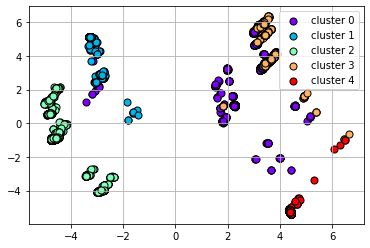

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

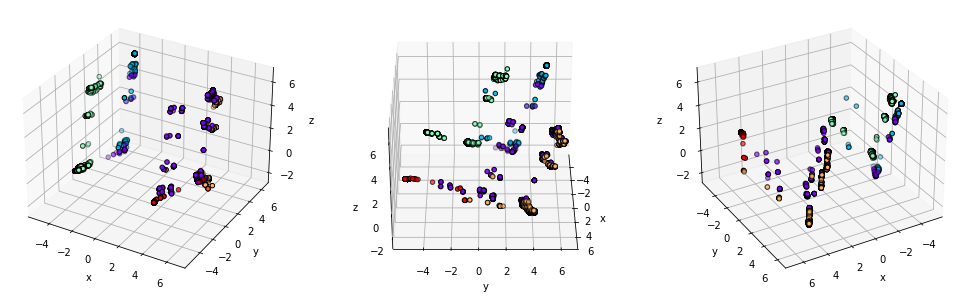

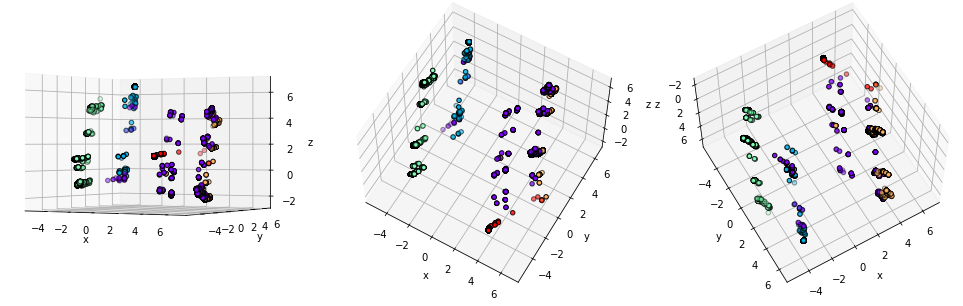

In [43]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [44]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [45]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -2.57401 -3.62502  0.97925 -1.46667 -0.66629  1.84924 -1.22328  4.01238   
1     -4.74535 -0.99146 -1.08780  0.13366 -0.03893  0.04677 -0.07851 -0.95108   
2      3.31426  3.24539 -1.71296 -0.75367  2.87928 -0.43061 -1.03957  0.28576   
3      3.87190  4.10629 -1.94759  0.99090 -1.17271  3.46577  0.41369  0.76494   
4     -3.29375  5.11222  6.54395 -3.11013  0.15257  0.19292  0.90009  0.00401   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  4.39921 -5.29090  1.15523 -0.10801 -0.10624 -0.05024 -0.00942  0.02247   
21564  3.66333  3.80090 -2.17548 -0.59977 -1.36157 -0.16309  0.29505 -0.00864   
21565 -4.55269 -0.85051 -0.95460  0.17219 -0.03785  0.04692 -0.10175  0.58104   
21566 -4.79490  0.56988  2.80966  2.05263 -0.66454 -1.83102 -1.56125  0.58668   
21567 -4.58290 -0.87112 -1.01128  0.14290  0.03147 -0.00708  0.27462  0.02898   

             8        9       10       11       12       13       14       15  \
0      1.99092  0.40700  0.15936 -0.38343 -1.77240  0.07763  0.12205  0.10035   
1      0.22408  0.26216  0.12797  0.26806 -0.09396 -0.05329 -0.02221  0.36471   
2     -0.22110 -0.42474 -0.07681  0.04761 -0.22248 -0.18486 -0.07694 -0.05592   
3     -1.96832  1.01781 -1.40537  0.58400 -0.21001 -0.32240 -0.76050 -0.26079   
4     -0.49831 -0.02580 -0.06929 -0.10210  0.03371 -0.04825  0.03570  0.05418   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563 -0.32336 -0.25381 -0.01867 -0.07373  0.06317 -0.00392 -0.05588  0.02595   
21564  0.29596 -0.24229  0.05284 -0.10541  0.07763  0.77369  0.24835 -0.17369   
21565 -0.58285 -0.61187 -0.01801 -0.28881  0.06396 -0.79539 -0.20882 -0.16134   
21566 -0.97847  1.31798 -0.01200 -0.62570  0.16370  0.19349 -0.00148  0.17715   
21567 -0.01203 -0.15788 -0.01388 -0.06971  0.13167  0.83602  0.17051 -0.18654   

            16       17       18       19       20       21       22       23  \
0      0.58717  0.18223 -0.24076  0.13139 -0.28711  2.26580 -0.16988  0.13205   
1      0.66621 -0.00110 -0.03245 -0.11704  0.14294 -0.00193  0.22832  0.01696   
2      0.27644  0.10745 -0.04694 -0.11553 -0.08911 -0.06738  0.02451  0.63352   
3     -0.27748  0.16518 -0.45879  0.53506  0.87294 -0.12119  0.02188  0.39164   
4      0.08602 -0.10812 -0.07105 -0.15913  0.16318 -0.02956  0.00024 -0.02222   
...        ...      ...      ...      ...      ...      ...      ...      ...   
21563  0.03896  0.00948  0.00719 -0.01065  0.04808  0.00959  0.09975  0.02170   
21564 -0.47475 -0.02973 -0.02584 -0.03678 -0.06180  0.04039 -0.07630  0.16048   
21565 -0.03916  0.01426 -0.06638  0.06729 -0.06818  0.04754 -0.23798 -0.42767   
21566 -0.00735 -0.05645 -0.03121  0.01454  0.04826 -0.00167  0.22008 -0.05052   
21567 -0.43863 -0.01609  0.04225  0.11761 -0.11928  0.03818 -0.21382  0.12077   

           24       25       26       27       28       29       30       31  \
0     0.12202 -0.18613 -0.03163  0.28890 -0.53898 -0.03817  0.13154  0.87160   
1     0.03736  0.04831 -0.03495  0.15367  0.06492 -0.11771 -0.00217 -0.02540   
2     1.09469 -0.19665 -0.38810 -0.21846 -0.07265  0.06205 -0.45736 -0.31781   
3     0.39897  0.04227  0.07993  0.22847 -0.60770 -0.40788  1.13179  0.87708   
4     0.00693 -0.01717 -0.05944  0.03907 -0.01722 -0.01546  0.00921  0.03106   
...       ...      ...      ...      ...      ...      ...      ...      ...   
21563 0.02890  0.05191 -0.10436  0.22286  0.06365 -0.04940  0.04138 -0.04315   
21564 0.00134  0.00733  0.08975 -0.01248  0.05159 -0.28989  0.09894  0.17128   
21565 0.11691  0.00780 -0.01994  0.00257  0.11596 -0.19079  0.05799 -0.03315   
21566 0.02228  0.06723 -0.00683 -0.19796 -0.01142  0.10757 -0.01512  0.02720   
21567 0.00313  0.07788  0.06465 -0.31045  0.00454 -0.25720  0.01938  0.16417   

            32       33       34       35       36       37       38       39  \
0      0.18118  0.02509 -0.23647  0.41857  0.65877 -

In [47]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [48]:
plt.rcParams["figure.figsize"] = (10,7)

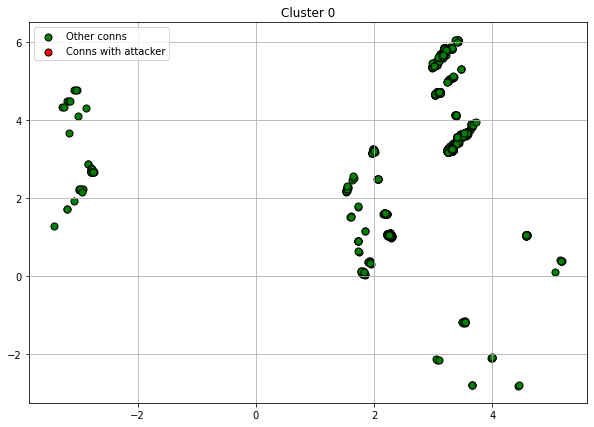

Total num of conns: 2945

Attacker conns ratio:
No    2945
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    544
192.168.10.17    452
192.168.10.15    341
192.168.10.14    338
192.168.10.25    334
192.168.10.16    327
192.168.10.9     191
192.168.10.12    165
192.168.10.5     153
192.168.10.51     83
192.168.10.50     17
Name: originated_ip, dtype: int64

23.50.75.27       158
178.255.83.1      132
23.61.187.27      112
72.21.91.29       107
50.63.243.230      94
                 ... 
50.19.250.40        1
152.163.56.2        1
74.121.142.165      1
5.196.119.249       1
172.217.12.196      1
Name: responded_ip, Length: 483, dtype: int64

Cluster 0 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num     responded_ip  \
5478             0.53453  192.168.10.15           0.31874      72.21.91.29   
1466             0.53453  192.168.10.16           0.68422    153.149.97.37   
6883             0.53453  192.168.10.17           0.09952      23.50.75.27   
10083            0.53453  192.168.10.25           0.77061    172.217.6.206   
16554            0.53453  192.168.10.19           0.77553  173.241.242.220   
7911             0.53453  192.168.10.25           0.77061   172.217.12.142   
7035             0.53453  192.168.10.51           0.50813    114.80.165.63   
14959            0.53453  192.168.10.15           0.31874      72.21.91.29   
16431            0.53453   192.168.10.9           0.96708  216.168.252.240   
3035             0.53453  192.168.10.51           0.22005      50.19.80.26   
7282             0.53453  192.168.10.12           0.22083    50.63.243.230   
19129            0.53453  192.168.10.15           0.77061   172.217.12.131   
12285            0.53453  192.168.10.19           0.64506  144.217.163.175   
5316             0.53453  192.168.10.19           0.22974      52.60.76.61   
13141            0.53453  192.168.10.17           0.88443    198.58.110.84   

                         timestamp  connection.time  duration  \
5478   2017-07-04T13:10:57.485805Z          0.19865  79.77944   
1466   2017-07-04T13:13:41.738737Z          0.28992   4.45410   
6883   2017-07-04T13:23:51.458608Z          0.62872 104.67086   
10083  2017-07-04T13:12:48.724999Z          0.26046   0.00000   
16554  2017-07-04T13:15:44.881406Z          0.35834   0.00008   
7911    2017-07-04T13:05:10.09719Z          0.00561   0.00000   
7035   2017-07-04T13:29:24.468679Z          0.81377   0.00000   
14959  2017-07-04T13:10:57.486073Z          0.19865  79.77826   
16431   2017-07-04T13:05:06.09159Z          0.00338  55.00676   
3035   2017-07-04T13:15:46.979924Z          0.35951   2.82333   
7282   2017-07-04T13:27:53.396667Z          0.76316   0.08190   
19129  2017-07-04T13:05:26.668538Z          0.01482 122.26640   
12285  2017-07-04T13:26:54.612671Z          0.73050   0.01644   
5316   2017-07-04T13:11:21.612245Z          0.21205   0.03006   
13141  2017-07-04T13:09:25.546143Z          0.14756   0.05753   

       connection.duration protocol service conn_state  connection.orig_p  \
5478               0.04455      tcp    http       RSTO            0.79900   
1466               0.00249      tcp    http         SF            0.89127   
6883               0.05845      tcp    http         SF            0.83610   
10083              0.00000      tcp    none         SH            0.76573   
16554              0.00000      tcp    none       RSTO            0.80419   
7911               0.00000      tcp    none         SH            0.75719   
7035               0.00000      tcp    none         S0            0.85478   
14959              0.04455      tcp    http       RSTO            0.79903   
16431              0.03071      tcp    none         SF            0.04578   
3035               0.00158      tcp    http         SF            0.54387   
7282               0.00005      tcp    http         SF            0.75151   
19129              0.06827      tcp    none         SF            0.79804   
12285              0.00001      udp     ntp         SF            0.00183   
5316               0.00002      udp     ntp         SF            0.00183   
13141              0.00003      udp     ntp         SF            0.00183   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
5478    52360  orig_reg_or_dyn                0.00052      436   
1466    58406  orig_reg_or_dyn                0.00109      910   
6883    54791  orig_reg_or_dyn                0.00052      434   
10083   50180  orig_reg_or_dyn                0.00000        0   
16554   52700  orig_reg_or_dyn                0.00000        0   
7911    49620  orig_reg_or_dyn                0.00000        0   
7035    56015  orig_re

Protocol:
tcp    2297
udp     648
Name: protocol, dtype: int64

Service:
http                  1166
none                  1117
ntp                    561
dns                     64
ssh                     21
ssl                      6
ftp-data                 4
ftp                      3
gssapi,smb,dce_rpc       3
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2324
orig_well_known     621
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            1690
resp_443            570
resp_123            561
resp_well_known      78
resp_22              22
resp_reg             19
resp_21               3
resp_dyn              2
Name: resp_p_cat, dtype: int64




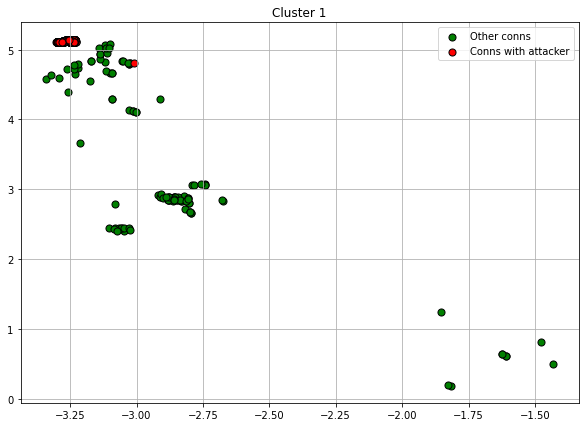

Total num of conns: 1140

Attacker conns ratio:
Yes    1018
No      122
Name: attacker_label, dtype: int64

IPs:
172.16.0.1       1018
192.168.10.25      18
192.168.10.12      18
192.168.10.8       16
192.168.10.16      14
192.168.10.15      12
192.168.10.19      10
192.168.10.17       8
192.168.10.14       8
192.168.10.51       6
192.168.10.5        6
192.168.10.9        4
210.151.8.24        1
185.49.84.72        1
Name: originated_ip, dtype: int64

192.168.10.50    1138
192.168.10.16       2
Name: responded_ip, dtype: int64

Cluster 1 NOK sample connections:


originated_ip_num originated_ip  responded_ip_num   responded_ip  \
4638             0.00000    172.16.0.1           0.85944  192.168.10.50   
4854             0.00000    172.16.0.1           0.85944  192.168.10.50   
16161            0.00000    172.16.0.1           0.85944  192.168.10.50   
15908            0.00000    172.16.0.1           0.85944  192.168.10.50   
19342            0.00000    172.16.0.1           0.85944  192.168.10.50   
4305             0.00000    172.16.0.1           0.85944  192.168.10.50   
17304            0.00000    172.16.0.1           0.85944  192.168.10.50   
291              0.00000    172.16.0.1           0.85944  192.168.10.50   
5591             0.00000    172.16.0.1           0.85944  192.168.10.50   
7469             0.00000    172.16.0.1           0.85944  192.168.10.50   
6435             0.00000    172.16.0.1           0.85944  192.168.10.50   
16111            0.00000    172.16.0.1           0.85944  192.168.10.50   
8097             0.00000    172.16.0.1           0.85944  192.168.10.50   
3198             0.00000    172.16.0.1           0.85944  192.168.10.50   
12375            0.00000    172.16.0.1           0.85944  192.168.10.50   

                         timestamp  connection.time  duration  \
4638   2017-07-04T13:06:33.045314Z          0.05170   8.96488   
4854   2017-07-04T13:10:00.998457Z          0.16726   8.87626   
16161  2017-07-04T13:20:07.023237Z          0.50401   9.71658   
15908  2017-07-04T13:05:39.772521Z          0.02210   8.57524   
19342  2017-07-04T13:16:32.532382Z          0.38482   8.93366   
4305   2017-07-04T13:20:01.518438Z          0.50095   8.92834   
17304  2017-07-04T13:17:57.465122Z          0.43202   8.97412   
291    2017-07-04T13:11:31.010735Z          0.21727   8.73978   
5591   2017-07-04T13:10:31.354241Z          0.18412   8.82000   
7469   2017-07-04T13:13:07.172155Z          0.27071   9.09478   
6435   2017-07-04T13:10:53.759055Z          0.19657   8.82710   
16111  2017-07-04T13:11:45.655037Z          0.22541   9.38554   
8097   2017-07-04T13:18:02.231191Z          0.43467   8.69596   
3198   2017-07-04T13:10:22.205025Z          0.17904   9.05336   
12375  2017-07-04T13:16:23.688495Z          0.37991   8.77006   

       connection.duration protocol service conn_state  connection.orig_p  \
4638               0.00501      tcp     ftp         SF            0.89014   
4854               0.00496      tcp     ftp         SF            0.89694   
16161              0.00543      tcp     ftp         SF            0.91752   
15908              0.00479      tcp     ftp         SF            0.88828   
19342              0.00499      tcp     ftp         SF            0.91019   
4305               0.00499      tcp     ftp         SF            0.91746   
17304              0.00501      tcp     ftp         SF            0.91321   
291                0.00488      tcp     ftp         SF            0.89994   
5591               0.00492      tcp     ftp         SF            0.89792   
7469               0.00508      tcp     ftp         SF            0.90326   
6435               0.00493      tcp     ftp         SF            0.89865   
16111              0.00524      tcp     ftp         SF            0.90045   
8097               0.00486      tcp     ftp         SF            0.91324   
3198               0.00506      tcp     ftp         SF            0.89765   
12375              0.00490      tcp     ftp         SF            0.90992   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
4638    58332  orig_reg_or_dyn                0.00014      113   
4854    58778  orig_reg_or_dyn                0.00013      112   
16161   60126  orig_reg_or_dyn                0.00013      109   
15908   58210  orig_reg_or_dyn                0.00015      122   
19342   59646  orig_reg_or_dyn                0.00014      117   
4305    60122  orig_reg_or_dyn                0.00015      126   
17304   59844  orig_reg_or_dyn                0.00014      118   
291 

Cluster 1 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num   responded_ip  \
164              0.53453  192.168.10.16           0.85944  192.168.10.50   
7527             0.53453  192.168.10.14           0.85944  192.168.10.50   
14178            0.53453  192.168.10.15           0.85944  192.168.10.50   
7635             0.53453  192.168.10.25           0.85944  192.168.10.50   
15420            0.53453  192.168.10.17           0.85944  192.168.10.50   
11620            0.53453   192.168.10.5           0.85944  192.168.10.50   
20674            0.53453  192.168.10.14           0.85944  192.168.10.50   
9848             0.53453   192.168.10.8           0.85944  192.168.10.50   
12502            0.53453  192.168.10.12           0.85944  192.168.10.50   
17665            0.53453  192.168.10.15           0.85944  192.168.10.50   
1096             0.53453  192.168.10.19           0.85944  192.168.10.50   
5050             0.53453  192.168.10.15           0.85944  192.168.10.50   
19143            0.53453  192.168.10.51           0.85944  192.168.10.50   
21391            0.53453   192.168.10.8           0.85944  192.168.10.50   
16773            0.53453  192.168.10.17           0.85944  192.168.10.50   

                         timestamp  connection.time  duration  \
164    2017-07-04T13:30:56.043541Z          0.86465   0.00006   
7527   2017-07-04T13:22:30.694782Z          0.58384   1.43537   
14178  2017-07-04T13:18:25.648845Z          0.44768   1.46140   
7635   2017-07-04T13:23:19.669687Z          0.61106   0.00000   
15420  2017-07-04T13:05:59.748923Z          0.03320   0.00000   
11620  2017-07-04T13:15:33.421464Z          0.35198   0.24010   
20674  2017-07-04T13:06:09.266234Z          0.03849   1.78617   
9848    2017-07-04T13:23:04.34502Z          0.60254   0.36309   
12502  2017-07-04T13:13:59.461226Z          0.29976   0.00000   
17665  2017-07-04T13:09:55.950323Z          0.16445   0.27945   
1096   2017-07-04T13:20:05.371391Z          0.50309   1.31890   
5050   2017-07-04T13:18:24.186063Z          0.44687   1.46205   
19143  2017-07-04T13:18:48.686323Z          0.46048   1.32843   
21391  2017-07-04T13:05:03.708706Z          0.00206   0.23919   
16773   2017-07-04T13:10:17.37248Z          0.17636   0.14414   

       connection.duration protocol   service conn_state  connection.orig_p  \
164                0.00000      tcp      none        OTH            0.88675   
7527               0.00080      tcp       ssh         SF            0.79537   
14178              0.00082      tcp       ssh         SF            0.80407   
7635               0.00000      udp       dns        SHR            0.75101   
15420              0.00000      udp       dns         SF            0.00204   
11620              0.00013      tcp       ftp         SF            0.81764   
20674              0.00100      tcp       ssh         SF            0.78431   
9848               0.00020      tcp       ftp         SF            0.78031   
12502              0.00000      udp       dns         SF            0.00204   
17665              0.00016      tcp       ftp         SF            0.79818   
1096               0.00074      tcp       ssh         SF            0.75699   
5050               0.00082      tcp       ssh         SF            0.80405   
19143              0.00074      tcp       ssh         SF            0.82592   
21391              0.00013      tcp  ftp-data         SF            0.78011   
16773              0.00008      tcp       ftp         SF            0.71948   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
164     58110  orig_reg_or_dyn                0.00000        0   
7527    52122  orig_reg_or_dyn                0.00154     1284   
14178   52692  orig_reg_or_dyn                0.00158     1316   
7635    49215  orig_reg_or_dyn                0.00000        0   
15420     137  orig_well_known                0.00007       62   
11620   53581  orig_reg_or_dyn                0.00011       88   
20674   51397  orig_re

Protocol:
tcp     1112
udp       26
icmp       2
Name: protocol, dtype: int64

Service:
ftp                   1028
ssh                     56
dns                     26
none                    13
ftp-data                10
gssapi,smb,dce_rpc       7
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1119
orig_well_known      21
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_21            1028
resp_22              56
resp_well_known      45
resp_reg              7
resp_dyn              3
resp_80               1
Name: resp_p_cat, dtype: int64




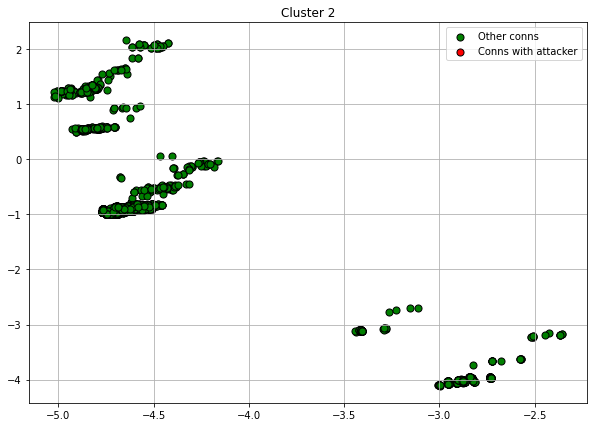

Total num of conns: 8791

Attacker conns ratio:
No    8791
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    1663
192.168.10.17    1551
192.168.10.15    1109
192.168.10.9      941
192.168.10.19     876
192.168.10.5      828
192.168.10.16     593
192.168.10.12     515
192.168.10.50     322
192.168.10.51     206
192.168.10.25     157
192.168.10.8       30
Name: originated_ip, dtype: int64

192.168.10.3    8791
Name: responded_ip, dtype: int64

Cluster 2 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num  responded_ip  \
5436             0.53453   192.168.10.9           0.85944  192.168.10.3   
8794             0.53453   192.168.10.9           0.85944  192.168.10.3   
20381            0.53453  192.168.10.14           0.85944  192.168.10.3   
5514             0.53453  192.168.10.14           0.85944  192.168.10.3   
15656            0.53453  192.168.10.17           0.85944  192.168.10.3   
9140             0.53453  192.168.10.17           0.85944  192.168.10.3   
21507            0.53453  192.168.10.14           0.85944  192.168.10.3   
7821             0.53453  192.168.10.50           0.85944  192.168.10.3   
3278             0.53453  192.168.10.14           0.85944  192.168.10.3   
20279            0.53453   192.168.10.9           0.85944  192.168.10.3   
4403             0.53453  192.168.10.17           0.85944  192.168.10.3   
3979             0.53453  192.168.10.15           0.85944  192.168.10.3   
7921             0.53453  192.168.10.17           0.85944  192.168.10.3   
12854            0.53453   192.168.10.5           0.85944  192.168.10.3   
7298             0.53453  192.168.10.16           0.85944  192.168.10.3   

                         timestamp  connection.time  duration  \
5436   2017-07-04T13:33:50.587346Z          0.96164   0.00023   
8794   2017-07-04T13:22:54.084899Z          0.59684   0.00022   
20381  2017-07-04T13:08:47.567007Z          0.12645   0.00017   
5514   2017-07-04T13:10:44.941238Z          0.19167   0.13883   
15656  2017-07-04T13:23:51.124213Z          0.62854   0.04708   
9140   2017-07-04T13:19:18.394139Z          0.47699   0.00034   
21507  2017-07-04T13:17:16.801992Z          0.40942   0.03210   
7821   2017-07-04T13:19:17.653153Z          0.47658   0.00018   
3278   2017-07-04T13:10:48.038952Z          0.19340   0.00015   
20279  2017-07-04T13:22:57.820391Z          0.59892   0.00020   
4403   2017-07-04T13:28:14.358911Z          0.77481   0.06181   
3979   2017-07-04T13:31:09.219914Z          0.87198   0.15122   
7921   2017-07-04T13:23:44.645042Z          0.62494   0.08980   
12854  2017-07-04T13:23:18.051898Z          0.61016   0.00018   
7298   2017-07-04T13:23:44.682932Z          0.62496   0.06225   

       connection.duration protocol service conn_state  connection.orig_p  \
5436               0.00000      udp     dns         SF            0.80295   
8794               0.00000      udp     dns         SF            0.78455   
20381              0.00000      udp     dns         SF            0.75156   
5514               0.00008      udp     dns         SF            0.96977   
15656              0.00003      udp     dns         SF            0.51836   
9140               0.00000      udp     dns         SF            0.61819   
21507              0.00002      udp     dns         SF            0.99164   
7821               0.00000      udp     dns         SF            0.36038   
3278               0.00000      udp     dns         SF            0.86325   
20279              0.00000      udp     dns         SF            0.84968   
4403               0.00003      udp     dns         SF            0.45794   
3979               0.00008      udp     dns         SF            0.99751   
7921               0.00005      udp     dns         SF            0.04099   
12854              0.00000      udp     dns         SF            0.83140   
7298               0.00003      udp     dns         SF            0.19169   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
5436    52619  orig_reg_or_dyn                0.00013      112   
8794    51413  orig_reg_or_dyn                0.00007       60   
20381   49251  orig_reg_or_dyn                0.00013      110   
5514    63550  orig_reg_or_dyn                0.00021      176   
15656   33970  orig_reg_or_dyn                0.00009       76   
9140    40512  orig_reg_or_dyn                0.00009       72   
21507   64983  orig_reg_or_dyn                0.00013      110   
7821

Protocol:
udp    8701
tcp      90
Name: protocol, dtype: int64

Service:
dns                8596
none                 74
ntp                  65
krb                  25
krb_tcp              11
dce_rpc               9
gssapi,smb,krb        9
gssapi,ntlm,smb       2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8716
orig_well_known      75
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8586
resp_well_known     112
resp_123             65
resp_reg             23
resp_dyn              5
Name: resp_p_cat, dtype: int64




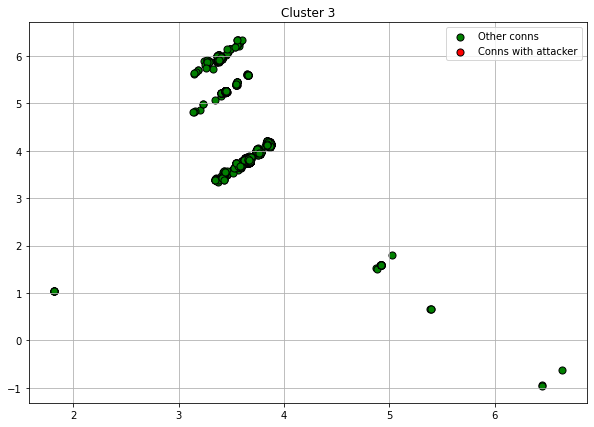

Total num of conns: 4121

Attacker conns ratio:
No    4121
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    854
192.168.10.17    811
192.168.10.9     394
192.168.10.5     359
192.168.10.12    354
192.168.10.15    343
192.168.10.19    323
192.168.10.25    252
192.168.10.16    214
192.168.10.51    208
192.168.10.50      3
192.168.10.3       3
192.168.10.8       3
Name: originated_ip, dtype: int64

162.213.33.50      56
173.241.242.143    52
52.84.134.210      43
157.240.2.25       38
172.217.12.162     38
                   ..
52.84.136.77        1
63.251.252.12       1
23.56.3.183         1
50.16.220.202       1
54.192.37.28        1
Name: responded_ip, Length: 1147, dtype: int64

Cluster 3 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num    responded_ip  \
18202            0.53453  192.168.10.25           0.46217   104.17.38.113   
6142             0.53453   192.168.10.5           0.15139  34.195.109.209   
6162             0.53453  192.168.10.17           0.29340    66.110.99.19   
8782             0.53453  192.168.10.14           0.88435   198.54.12.127   
11386            0.53453  192.168.10.14           0.77061   172.217.2.162   
2562             0.53453  192.168.10.17           0.30794   69.172.216.55   
11706            0.53453   192.168.10.9           0.23230    52.206.65.84   
13434            0.53453  192.168.10.15           0.24024   54.148.10.141   
6571             0.53453  192.168.10.17           0.22997    52.73.61.178   
743              0.53453  192.168.10.16           0.77061  172.217.12.206   
21489            0.53453  192.168.10.15           0.77061  172.217.10.238   
13881            0.53453  192.168.10.51           0.77061    172.217.10.1   
135              0.53453  192.168.10.15           0.77061     172.217.7.4   
14408            0.53453  192.168.10.14           0.77061  172.217.10.238   
8159             0.53453  192.168.10.15           0.77061   172.217.6.206   

                         timestamp  connection.time  duration  \
18202  2017-07-04T13:12:01.206357Z          0.23405   1.12123   
6142   2017-07-04T13:10:21.655125Z          0.17874   5.62963   
6162   2017-07-04T13:27:28.566752Z          0.74936   5.42283   
8782   2017-07-04T13:10:44.276078Z          0.19131 127.40262   
11386  2017-07-04T13:09:45.093382Z          0.15842 207.73088   
2562   2017-07-04T13:23:51.472419Z          0.62873   0.20661   
11706  2017-07-04T13:23:00.910094Z          0.60063  15.96421   
13434  2017-07-04T13:18:47.850599Z          0.46002  60.86114   
6571   2017-07-04T13:23:52.454707Z          0.62928  90.65107   
743    2017-07-04T13:24:17.406148Z          0.64314 181.12254   
21489  2017-07-04T13:14:52.711001Z          0.32935 182.66501   
13881   2017-07-04T13:15:48.97263Z          0.36062   0.19228   
135    2017-07-04T13:31:10.452805Z          0.87266 186.68557   
14408  2017-07-04T13:09:01.413593Z          0.13415   0.17404   
8159   2017-07-04T13:14:22.722865Z          0.31269 195.17213   

       connection.duration protocol service conn_state  connection.orig_p  \
18202              0.00063      tcp     ssl         S1            0.76702   
6142               0.00314      tcp     ssl         SF            0.81611   
6162               0.00303      tcp     ssl         SF            0.67455   
8782               0.07114      tcp     ssl         SF            0.79094   
11386              0.11599      tcp     ssl         SF            0.78895   
2562               0.00012      tcp     ssl         SF            0.76454   
11706              0.00891      tcp     ssl         SF            0.05292   
13434              0.03398      tcp     ssl         SF            0.80416   
6571               0.05062      tcp     ssl         SF            0.85945   
743                0.10114      tcp     ssl         SF            0.57849   
21489              0.10200      tcp     ssl         SF            0.80239   
13881              0.00011      tcp     ssl         SF            0.74113   
135                0.10424      tcp     ssl         SF            0.80663   
14408              0.00010      tcp     ssl         SF            0.78757   
8159               0.10898      tcp     ssl         SF            0.80071   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
18202   50264  orig_reg_or_dyn                0.00156     1302   
6142    53481  orig_reg_or_dyn                0.00042      353   
6162    44205  orig_reg_or_dyn                0.00045      377   
8782    51832  orig_reg_or_dyn                0.00279     2321   
11386   51701  orig_reg_or_dyn                0.00188     1566   
2562    50102  orig_reg_or_dyn                0.00195     1623   
11706    3471  orig_reg_or_dyn        

Protocol:
tcp    4121
Name: protocol, dtype: int64

Service:
ssl     4100
none      21
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4121
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           4094
resp_well_known      16
resp_reg              6
resp_80               5
Name: resp_p_cat, dtype: int64




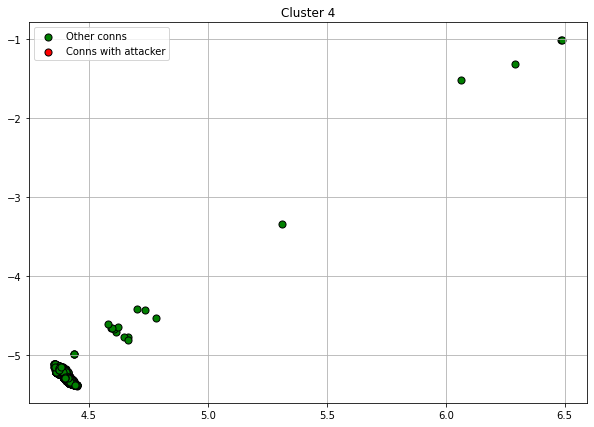

Total num of conns: 4571

Attacker conns ratio:
No    4571
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    4571
Name: originated_ip, dtype: int64

192.168.10.1      4554
192.168.10.255      11
65.52.108.224        1
40.70.221.249        1
65.52.108.186        1
64.4.54.254          1
224.0.1.24           1
224.0.0.252          1
Name: responded_ip, dtype: int64

Cluster 4 OK sample connections:


originated_ip_num originated_ip  responded_ip_num  responded_ip  \
2921             0.53453  192.168.10.3           0.85944  192.168.10.1   
4944             0.53453  192.168.10.3           0.85944  192.168.10.1   
3355             0.53453  192.168.10.3           0.85944  192.168.10.1   
12189            0.53453  192.168.10.3           0.85944  192.168.10.1   
3170             0.53453  192.168.10.3           0.85944  192.168.10.1   
3327             0.53453  192.168.10.3           0.85944  192.168.10.1   
19708            0.53453  192.168.10.3           0.85944  192.168.10.1   
12251            0.53453  192.168.10.3           0.85944  192.168.10.1   
1723             0.53453  192.168.10.3           0.85944  192.168.10.1   
353              0.53453  192.168.10.3           0.85944  192.168.10.1   
14761            0.53453  192.168.10.3           0.85944  192.168.10.1   
20174            0.53453  192.168.10.3           0.85944  192.168.10.1   
1271             0.53453  192.168.10.3           0.85944  192.168.10.1   
14014            0.53453  192.168.10.3           0.85944  192.168.10.1   
16411            0.53453  192.168.10.3           0.85944  192.168.10.1   

                         timestamp  connection.time  duration  \
2921     2017-07-04T13:10:16.2218Z          0.17572   0.36097   
4944   2017-07-04T13:06:09.748536Z          0.03876   0.04916   
3355   2017-07-04T13:10:59.450311Z          0.19974   0.07601   
12189  2017-07-04T13:28:35.430063Z          0.78652   0.24151   
3170   2017-07-04T13:15:48.074284Z          0.36012   1.29716   
3327   2017-07-04T13:10:36.375192Z          0.18691   0.57771   
19708  2017-07-04T13:10:09.940582Z          0.17223   0.05976   
12251  2017-07-04T13:06:14.468527Z          0.04138   0.25717   
1723   2017-07-04T13:33:08.794989Z          0.93842   0.12027   
353    2017-07-04T13:23:46.824837Z          0.62615   0.00049   
14761  2017-07-04T13:27:49.482619Z          0.76099   0.12153   
20174  2017-07-04T13:23:42.118716Z          0.62353   0.20644   
1271   2017-07-04T13:10:39.886696Z          0.18887   0.02363   
14014  2017-07-04T13:32:01.497453Z          0.90103   0.05130   
16411  2017-07-04T13:06:07.737672Z          0.03764   0.02329   

       connection.duration protocol service conn_state  connection.orig_p  \
2921               0.00020      udp     dns         SF            0.94946   
4944               0.00003      udp     dns         SF            0.93211   
3355               0.00004      udp     dns         SF            0.93723   
12189              0.00013      udp     dns         SF            0.92217   
3170               0.00072      udp     dns         SF            0.95020   
3327               0.00032      udp     dns         SF            0.93624   
19708              0.00003      udp     dns         SF            0.95208   
12251              0.00014      udp     dns         SF            0.93519   
1723               0.00007      udp     dns         SF            0.91817   
353                0.00000      udp     dns         SF            0.94499   
14761              0.00007      udp     dns         SF            0.91843   
20174              0.00012      udp     dns         SF            0.94880   
1271               0.00001      udp     dns         SF            0.95292   
14014              0.00003      udp     dns         SF            0.93525   
16411              0.00001      udp     dns         SF            0.92429   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
2921    62219  orig_reg_or_dyn                0.00005       42   
4944    61082  orig_reg_or_dyn                0.00005       45   
3355    61418  orig_reg_or_dyn                0.00005       44   
12189   60431  orig_reg_or_dyn                0.00007       56   
3170    62268  orig_reg_or_dyn                0.00013      111   
3327    61353  orig_reg_or_dyn                0.00005       42   
19708   62391  orig_reg_or_dyn                0.00006       51   
12251   61284  orig_

Protocol:
udp    4567
tcp       4
Name: protocol, dtype: int64

Service:
dns     4563
none       6
ssl        2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4559
orig_well_known      12
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4554
resp_well_known      12
resp_443              4
resp_reg              1
Name: resp_p_cat, dtype: int64




In [49]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [50]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

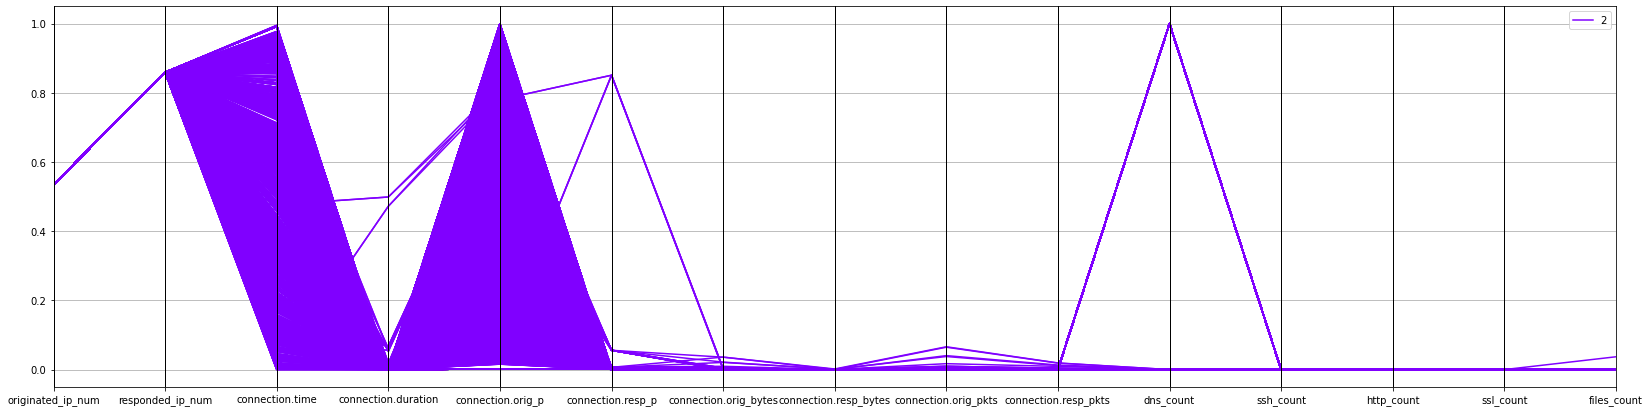

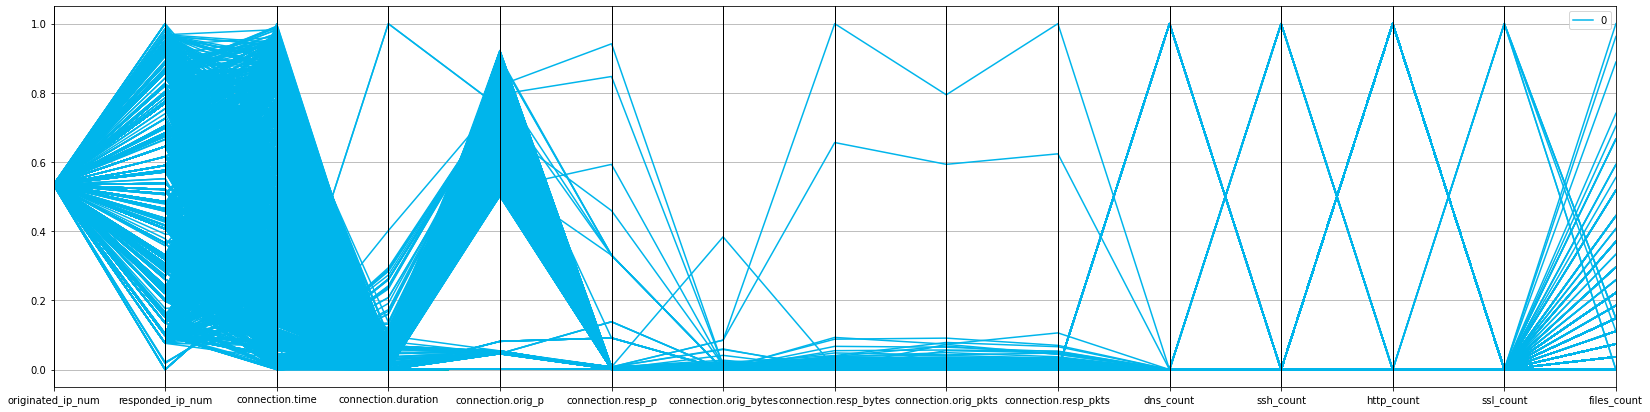

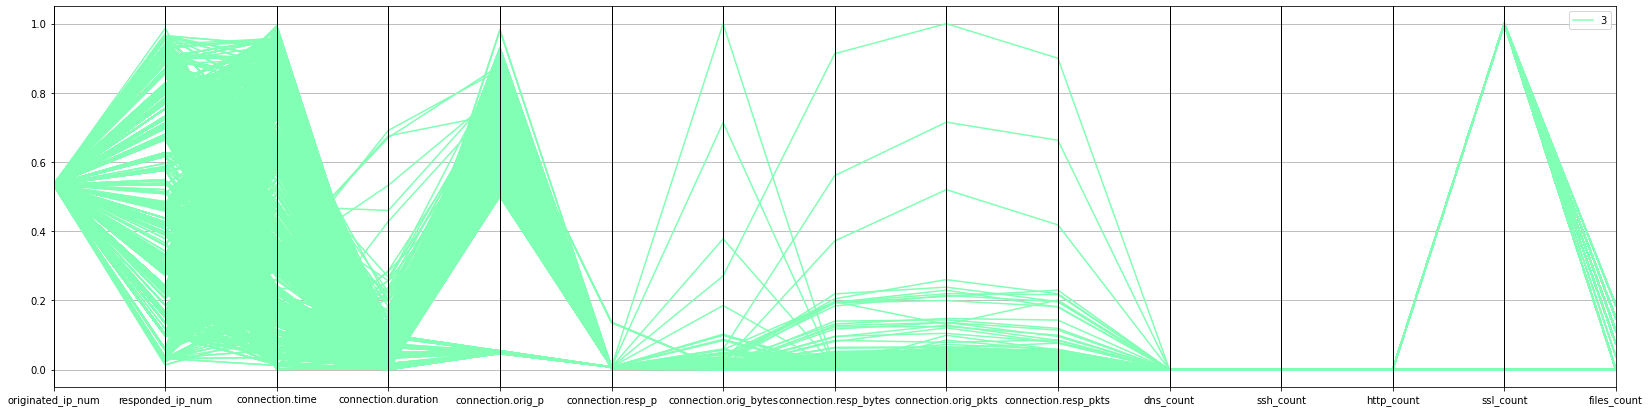

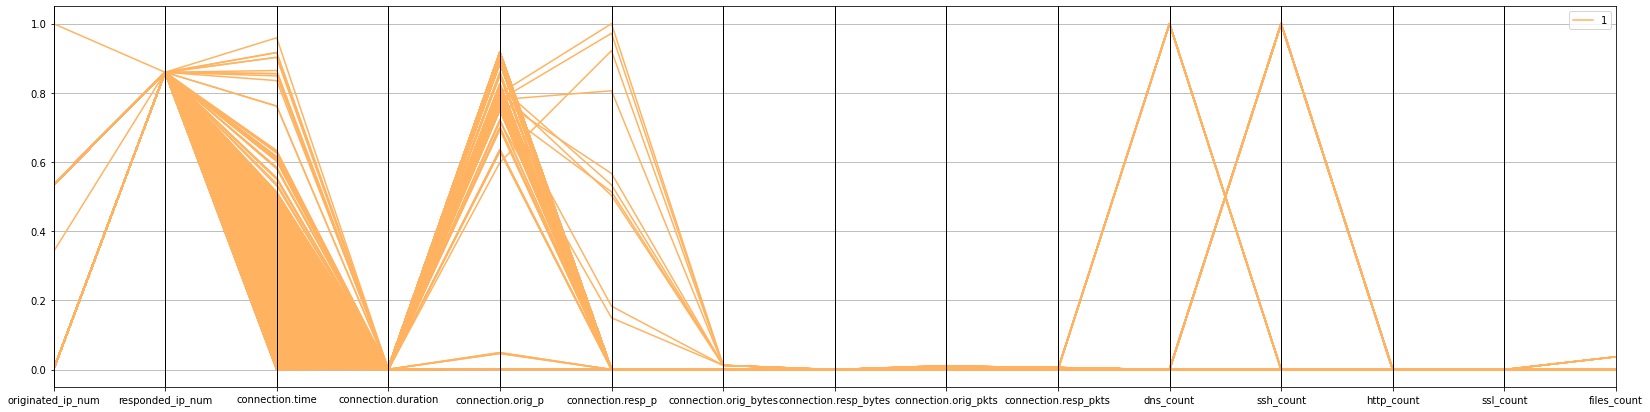

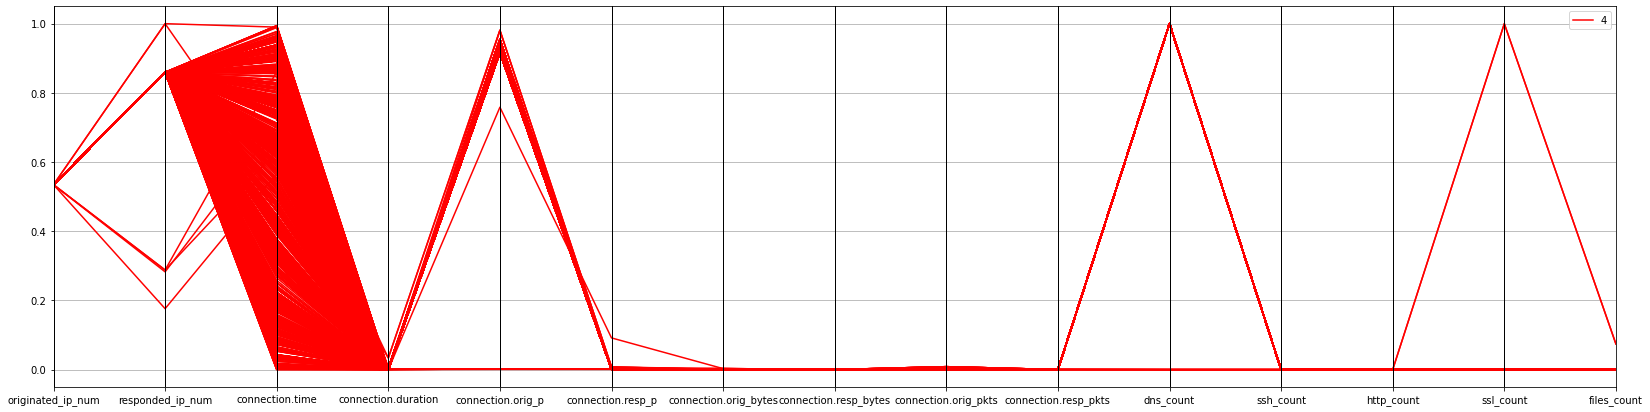

In [51]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

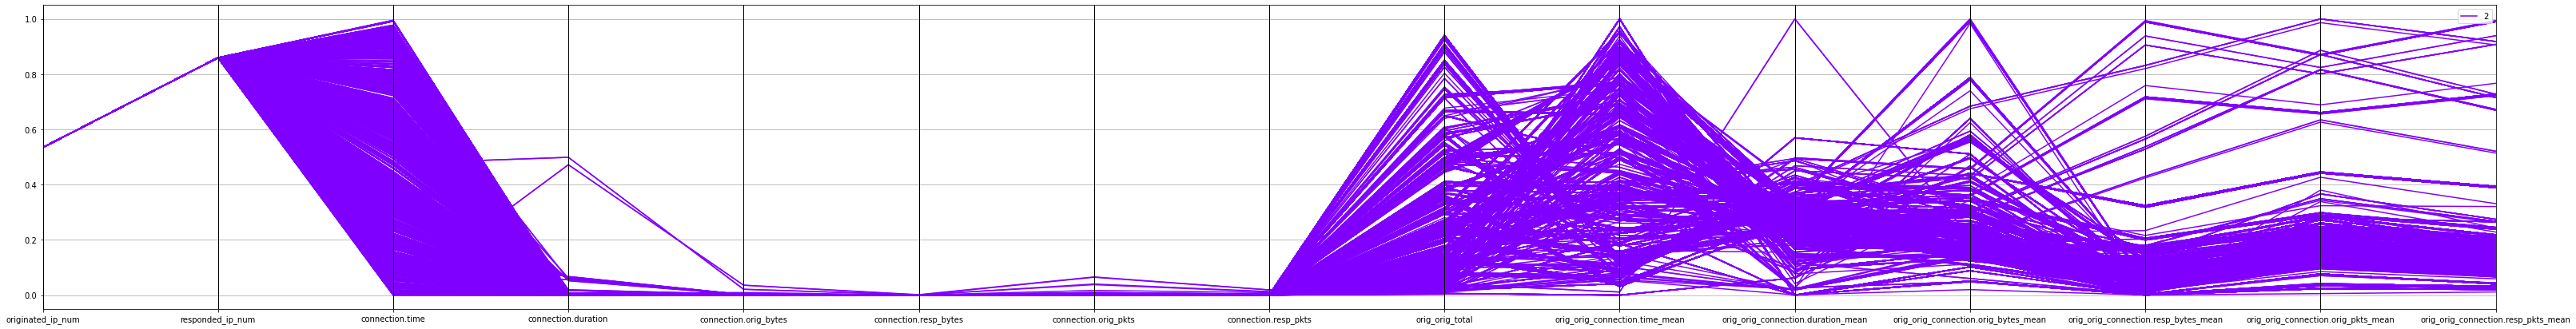

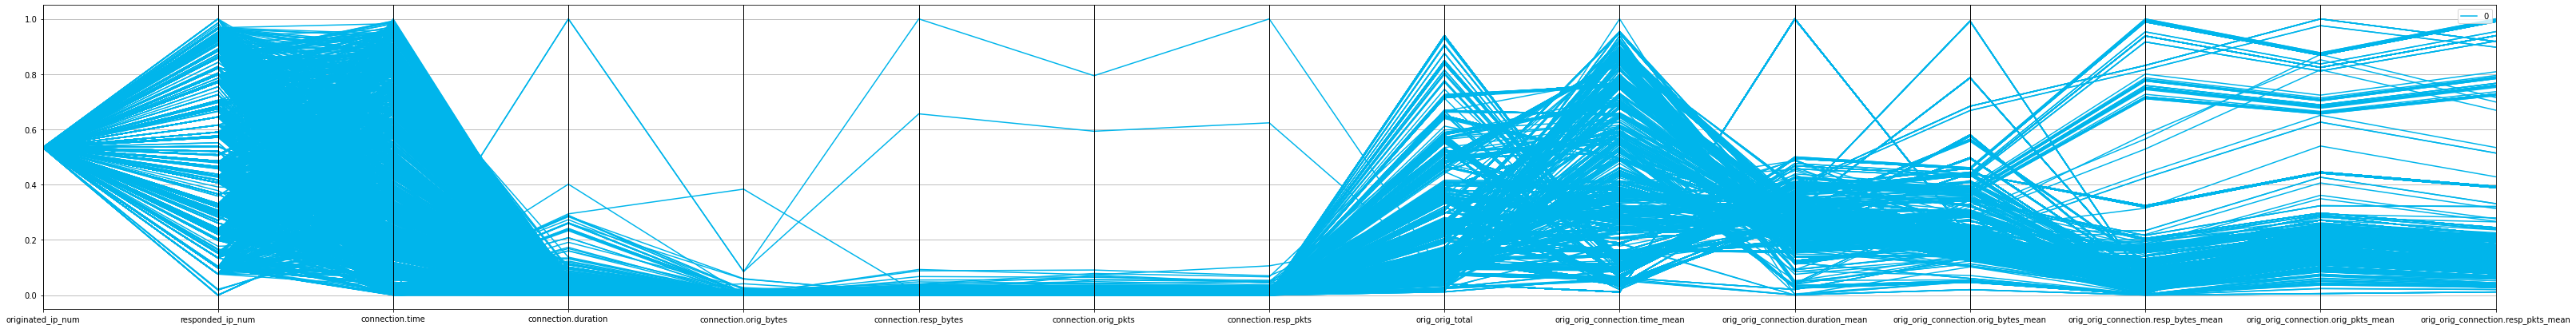

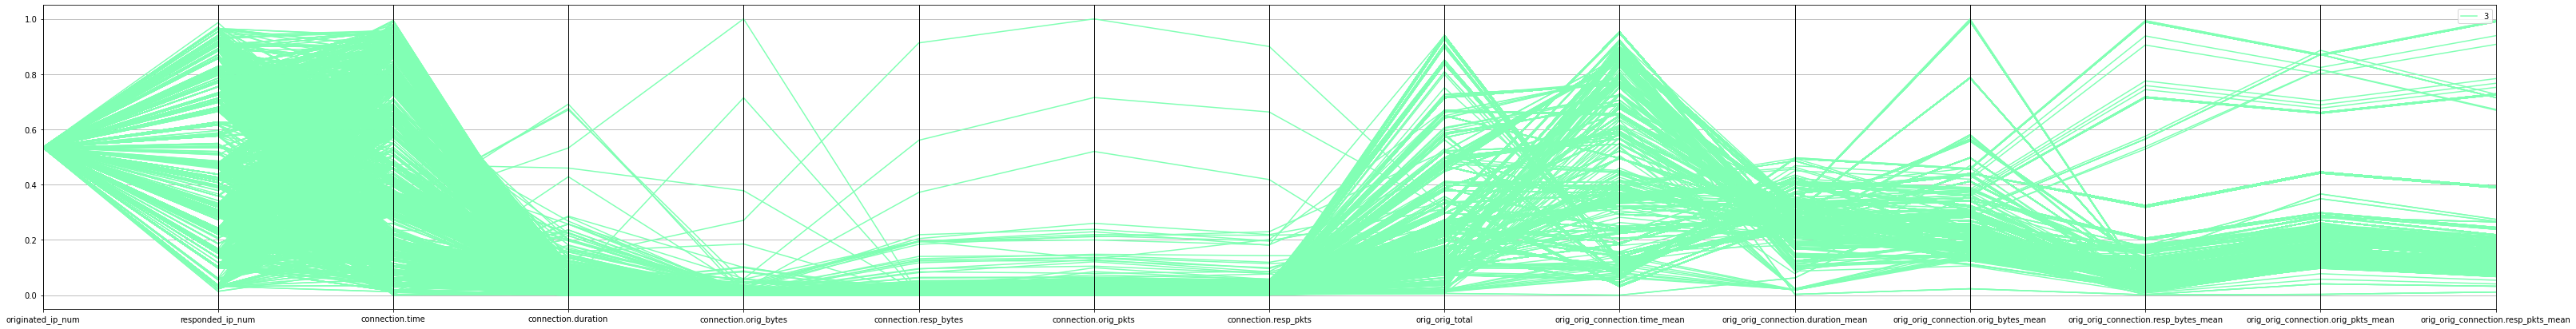

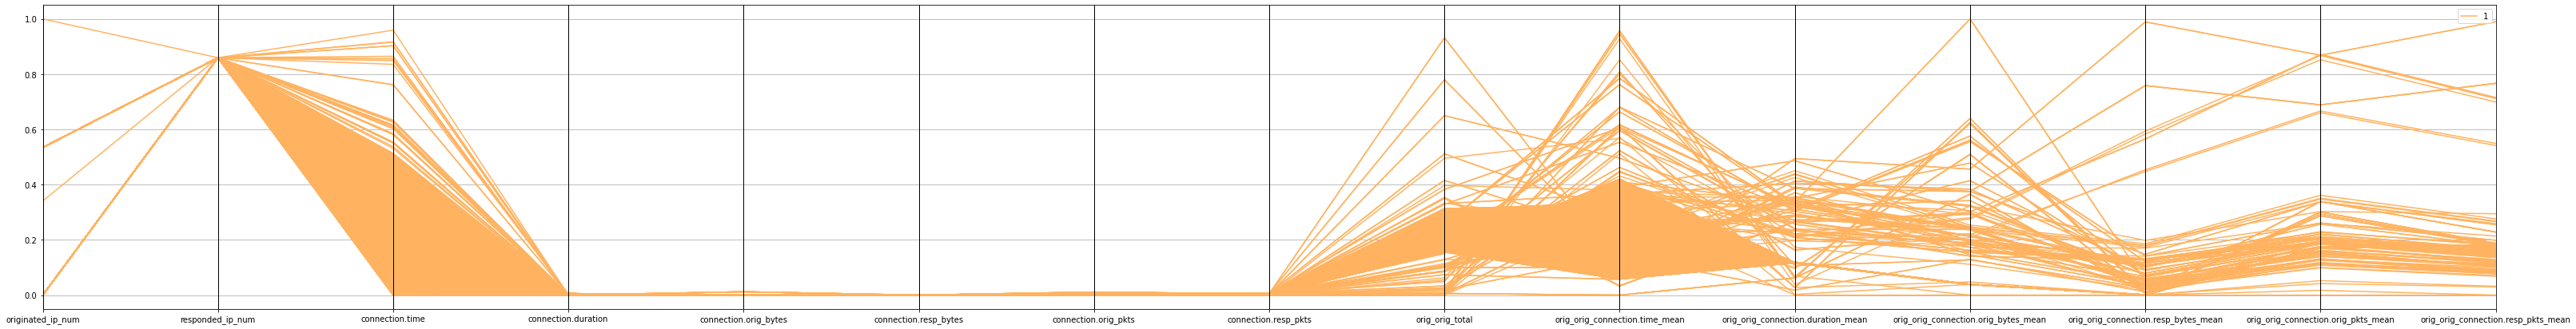

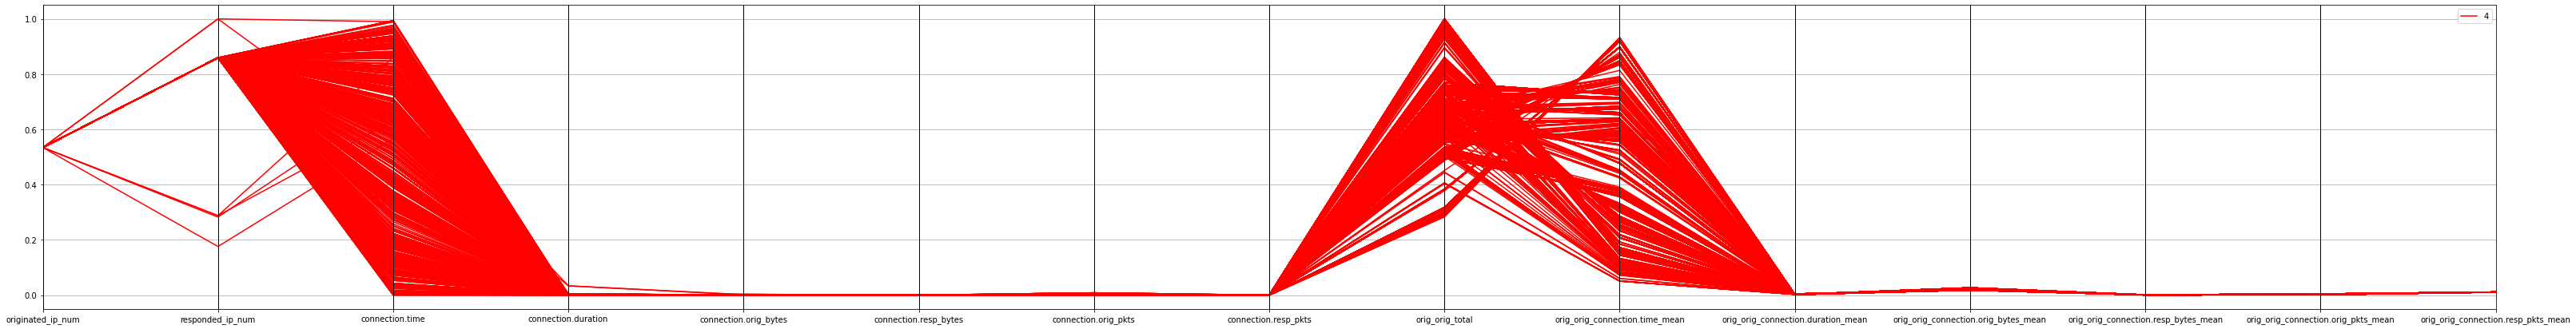

In [52]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()